In [1]:
%%capture
!pip install geopandas 
!pip install geoplot

In [2]:
import geopandas as gpd
import geoplot as gplt
import pandas as pd
from shapely.geometry import Point

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
#Загружаем все дома на Васильевском острове 
house_vo = gpd.read_file("house_vo.geojson")                      
house_vo

,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance,people,geometry
0,59.964376,59.91726,30.316861,30.177873,298216825,relation,1114252,59.939275,30.243876,"Василеостровский район, Saint Petersburg, Nort...",boundary,administrative,0.600226,4,"MULTIPOLYGON (((30.28823 59.93753, 30.28846 59..."
1,59.964376,59.91726,30.316861,30.177873,298216825,relation,1114252,59.939275,30.243876,"Василеостровский район, Saint Petersburg, Nort...",boundary,administrative,0.600226,3,"MULTIPOLYGON (((30.28759 59.93736, 30.28787 59..."
2,59.964376,59.91726,30.316861,30.177873,298216825,relation,1114252,59.939275,30.243876,"Василеостровский район, Saint Petersburg, Nort...",boundary,administrative,0.600226,2,"MULTIPOLYGON (((30.28681 59.93740, 30.28719 59..."
3,59.964376,59.91726,30.316861,30.177873,298216825,relation,1114252,59.939275,30.243876,"Василеостровский район, Saint Petersburg, Nort...",boundary,administrative,0.600226,7,"MULTIPOLYGON (((30.28667 59.93684, 30.28662 59..."
4,59.964376,59.91726,30.316861,30.177873,298216825,relation,1114252,59.939275,30.243876,"Василеостровский район, Saint Petersburg, Nort...",boundary,administrative,0.600226,2,"MULTIPOLYGON (((30.28621 59.93722, 30.28626 59..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,59.964376,59.91726,30.316861,30.177873,298216825,relation,1114252,59.939275,30.243876,"Василеостровский район, Saint Petersburg, Nort...",boundary,administrative,0.600226,6,"MULTIPOLYGON (((30.24105 59.92783, 30.24108 59..."
1137,59.964376,59.91726,30.316861,30.177873,298216825,relation,1114252,59.939275,30.243876,"Василеостровский район, Saint Petersburg, Nort...",boundary,administrative,0.600226,9,"MULTIPOLYGON (((30.24117 59.92756, 30.24126 59..."
1138,59.964376,59.91726,30.316861,30.177873,298216825,relation,1114252,59.939275,30.243876,"Василеостровский район, Saint Petersburg, Nort...",boundary,administrative,0.600226,2,"MULTIPOLYGON (((30.24155 59.92754, 30.24177 59..."
1139,59.964376,59.91726,30.316861,30.177873,298216825,relation,1114252,59.939275,30.243876,"Василеостровский район, Saint Petersburg, Nort...",boundary,administrative,0.600226,6,"MULTIPOLYGON (((30.24199 59.92741, 30.24198 59..."


In [4]:
#Итоговый список домов (удалим ненужные столбцы)
house_itog = house_vo.loc[:, ['people', 'geometry']]
house_itog

,people,geometry
0,4,"MULTIPOLYGON (((30.28823 59.93753, 30.28846 59..."
1,3,"MULTIPOLYGON (((30.28759 59.93736, 30.28787 59..."
2,2,"MULTIPOLYGON (((30.28681 59.93740, 30.28719 59..."
3,7,"MULTIPOLYGON (((30.28667 59.93684, 30.28662 59..."
4,2,"MULTIPOLYGON (((30.28621 59.93722, 30.28626 59..."
...,...,...
1136,6,"MULTIPOLYGON (((30.24105 59.92783, 30.24108 59..."
1137,9,"MULTIPOLYGON (((30.24117 59.92756, 30.24126 59..."
1138,2,"MULTIPOLYGON (((30.24155 59.92754, 30.24177 59..."
1139,6,"MULTIPOLYGON (((30.24199 59.92741, 30.24198 59..."


In [5]:
#загружаем общественные пространства на Васильевском острове 
vas_new = gpd.read_file("Vas_new.geojson")
vas_new.head(5)

,id,area_type,Тип,Городская функция,functional_type,area,exists,geometry
0,1057,large,NaN,NaN,,17921.770684,потенциальное,"POLYGON ((30.23315 59.94747, 30.23367 59.94741..."
1,229,medium,NaN,NaN,,695.402998,потенциальное,"POLYGON ((30.24831 59.95139, 30.24836 59.95127..."
2,230,small,NaN,NaN,,219.378711,потенциальное,"POLYGON ((30.24827 59.95094, 30.24819 59.95092..."
3,231,small,NaN,NaN,,391.590199,потенциальное,"POLYGON ((30.24856 59.95075, 30.24859 59.95065..."
4,260,large,NaN,NaN,,1493.532095,потенциальное,"POLYGON ((30.23038 59.94712, 30.23047 59.94711..."


In [6]:
#Оставим только нужные столбцы для общественных пространств (ОП)

vas_itog = vas_new.loc[:, ['id', 'area_type', 'area', 'geometry']]
vas_itog.head(5)

,id,area_type,area,geometry
0,1057,large,17921.770684,"POLYGON ((30.23315 59.94747, 30.23367 59.94741..."
1,229,medium,695.402998,"POLYGON ((30.24831 59.95139, 30.24836 59.95127..."
2,230,small,219.378711,"POLYGON ((30.24827 59.95094, 30.24819 59.95092..."
3,231,small,391.590199,"POLYGON ((30.24856 59.95075, 30.24859 59.95065..."
4,260,large,1493.532095,"POLYGON ((30.23038 59.94712, 30.23047 59.94711..."


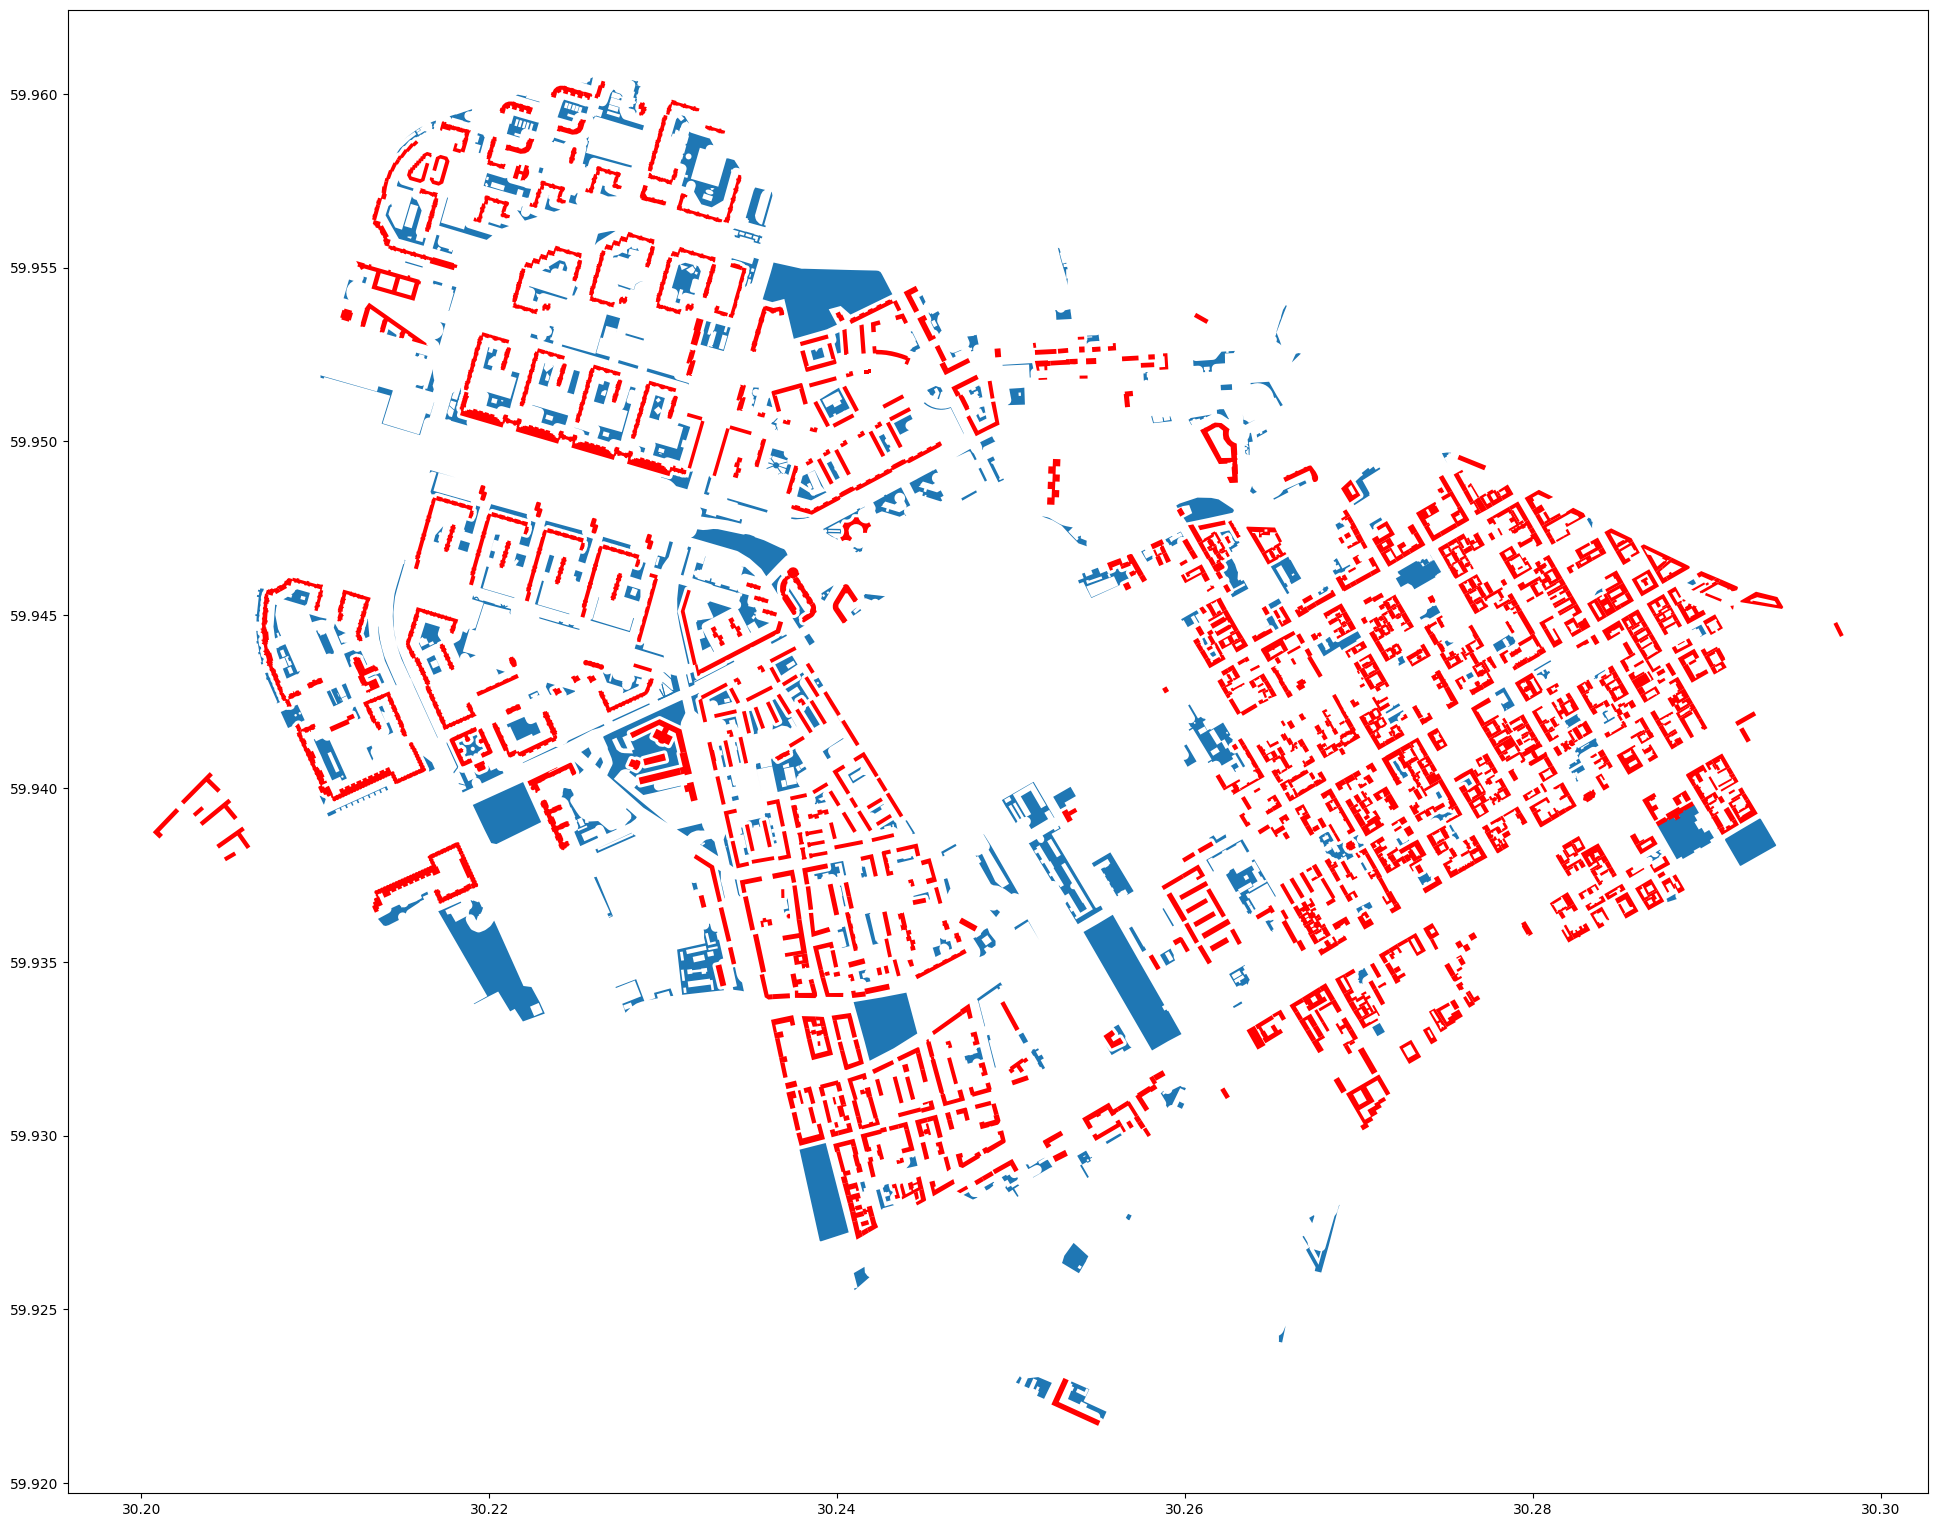

In [7]:
#Нарисуем 
pip_houses = house_itog['geometry']

from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(24, 22))
vas_itog.plot(ax=ax)
pip_houses.plot(markersize=5.8, color='red',ax=ax)
plt.show()

In [8]:
#как посмотреть с какими координатами связан датасет
vas_itog.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
house_itog.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
#Подходящая CRS (система отсчета координат) для Санкт-Петербурга, Россия, geopandas зависит от конкретного приложения и используемых данных. 
#Тем не менее, обычно используемой CRS для Санкт-Петербурга является EPSG:32635, которая представляет собой проекцию зоны UTM 35N. 
#Эта CRS подходит для картографирования и анализа данных на территории вокруг Санкт-Петербурга.

#Вот пример того, как установить CRS GeoDataFrameдля EPSG:32635:

#ЭТО НУЖНО, ЧТОБЫ МЕТОДЫ ГЕОАНАЛИЗА РАБОТАЛИ

# set the CRS to EPSG:32635
vas_op = vas_itog.to_crs(epsg=32635)
vas_op.head(5)

,id,area_type,area,geometry
0,1057,large,17921.770684,"POLYGON ((680575.662 6649972.548, 680604.988 6..."
1,229,medium,695.402998,"POLYGON ((681400.326 6650450.950, 681403.754 6..."
2,230,small,219.378711,"POLYGON ((681400.693 6650400.704, 681396.048 6..."
3,231,small,391.590199,"POLYGON ((681417.711 6650379.769, 681420.299 6..."
4,260,large,1493.532095,"POLYGON ((680422.889 6649926.121, 680427.970 6..."


In [11]:
#то же самое сделаем с домами
vas_house = house_itog.to_crs(epsg=32635)
vas_house.head(5)

,people,geometry
0,4,"MULTIPOLYGON (((683705.273 6649018.178, 683719..."
1,3,"MULTIPOLYGON (((683670.593 6648998.103, 683685..."
2,2,"MULTIPOLYGON (((683626.625 6648999.777, 683649..."
3,7,"MULTIPOLYGON (((683621.914 6648936.886, 683618..."
4,2,"MULTIPOLYGON (((683594.308 6648978.193, 683597..."


In [12]:
#проверяем crs
vas_op.crs

<Projected CRS: EPSG:32635>
Name: WGS 84 / UTM zone 35N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 24°E and 30°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Bulgaria. Central African Republic. Democratic Republic of the Congo (Zaire). Egypt. Estonia. Finland. Greece. Latvia. Lesotho. Libya. Lithuania. Moldova. Norway. Poland. Romania. Russian Federation. Sudan. Svalbard. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (24.0, 0.0, 30.0, 84.0)
Coordinate Operation:
- name: UTM zone 35N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
#проверяем crs
vas_house.crs

<Projected CRS: EPSG:32635>
Name: WGS 84 / UTM zone 35N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 24°E and 30°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Bulgaria. Central African Republic. Democratic Republic of the Congo (Zaire). Egypt. Estonia. Finland. Greece. Latvia. Lesotho. Libya. Lithuania. Moldova. Norway. Poland. Romania. Russian Federation. Sudan. Svalbard. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (24.0, 0.0, 30.0, 84.0)
Coordinate Operation:
- name: UTM zone 35N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
#Теперь, когда мы установили правильную проекцию CRS, мы готовы исследовать атрибуты GeoDataFrames.

In [15]:
#Вычислим центроиды у каждого датафрейма, чтобы вычислять расстояния между ними (между домами и ОП)

vas_op['centroid']=vas_op.centroid
vas_op.head(5)

,id,area_type,area,geometry,centroid
0,1057,large,17921.770684,"POLYGON ((680575.662 6649972.548, 680604.988 6...",POINT (680667.453 6649919.284)
1,229,medium,695.402998,"POLYGON ((681400.326 6650450.950, 681403.754 6...",POINT (681385.322 6650454.104)
2,230,small,219.378711,"POLYGON ((681400.693 6650400.704, 681396.048 6...",POINT (681407.436 6650397.687)
3,231,small,391.590199,"POLYGON ((681417.711 6650379.769, 681420.299 6...",POINT (681403.451 6650369.898)
4,260,large,1493.532095,"POLYGON ((680422.889 6649926.121, 680427.970 6...",POINT (680407.458 6649874.026)


In [16]:
#То же самое делаем с домами

vas_house['centroid']=vas_house.centroid
vas_house.head(5)

,people,geometry,centroid
0,4,"MULTIPOLYGON (((683705.273 6649018.178, 683719...",POINT (683715.250 6648985.356)
1,3,"MULTIPOLYGON (((683670.593 6648998.103, 683685...",POINT (683681.101 6648986.121)
2,2,"MULTIPOLYGON (((683626.625 6648999.777, 683649...",POINT (683621.845 6648974.443)
3,7,"MULTIPOLYGON (((683621.914 6648936.886, 683618...",POINT (683637.973 6648930.801)
4,2,"MULTIPOLYGON (((683594.308 6648978.193, 683597...",POINT (683596.899 6648951.090)


## Целочисленное программирование

Исходя из задачи, допустим, что мы хотим максимизировать обеспеченность домов общественными пространствами, учитывая доступное количество каждого типа пространств и ограничения на загруженность.

In [17]:
!pip install pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 89.8 MB/s eta 0:00:00


код ниже реализует задачу присвоения домов общественным пространствам, используя целочисленное программирование и библиотеку pulp

In [18]:
import pulp

# переменные для задачи
n_houses = len(vas_house)
n_spaces = len(vas_op)
house_demands = vas_house['people'].tolist()

# Создаем оптимизационную модель
model = pulp.LpProblem("House_to_Space_Assignment", pulp.LpMaximize)

# Создаем переменные принятия решения (целочисленные) для каждой пары дом/общественное пространство
x = pulp.LpVariable.dicts("x", (range(n_houses), range(n_spaces)), cat='Binary')

# Создаем функцию цели(обджектив фанкшн)
objective = pulp.lpSum(house_demands[h] * x[h][s] for h in range(n_houses) for s in range(n_spaces))
model += objective

# Создаем ограничения:
# 1) Ограничения на количество доступных общественных пространств каждого типа
for s in range(n_spaces):
    model += pulp.lpSum(x[h][s] for h in range(n_houses)) <= vas_op.iloc[s]['area']

# 2) Ограничения на загруженность общественных пространств
for h in range(n_houses):
    model += pulp.lpSum(x[h][s] for s in range(n_spaces)) <= 1

# запуск модели для решения
model.solve()


print("Status:", pulp.LpStatus[model.status])
print("Objective:", pulp.value(model.objective))

for h in range(n_houses):
    for s in range(n_spaces):
        if x[h][s].varValue > 0:
            print(f"Дом {h} должен быть назначен общественному пространству {s}")


Status: Optimal
Objective: 9322.0
Дом 0 должен быть назначен общественному пространству 150
Дом 1 должен быть назначен общественному пространству 150
Дом 2 должен быть назначен общественному пространству 164
Дом 3 должен быть назначен общественному пространству 172
Дом 4 должен быть назначен общественному пространству 150
Дом 5 должен быть назначен общественному пространству 172
Дом 6 должен быть назначен общественному пространству 172
Дом 7 должен быть назначен общественному пространству 259
Дом 8 должен быть назначен общественному пространству 164
Дом 9 должен быть назначен общественному пространству 150
Дом 10 должен быть назначен общественному пространству 172
Дом 11 должен быть назначен общественному пространству 346
Дом 12 должен быть назначен общественному пространству 150
Дом 13 должен быть назначен общественному пространству 172
Дом 14 должен быть назначен общественному пространству 150
Дом 15 должен быть назначен общественному пространству 172
Дом 16 должен быть назначен обще

# НЕЙРОНКА

нам нужно сначала подготовить данные и создать модель нейронной сети.

Для обучения модели нам нужно подготовить данные, которые будут использоваться для тренировки и тестирования модели. В нашем случае, мы будем использовать граф, который был создан для целочисленного программирования, чтобы создать матрицу признаков и целевую переменную. В матрице признаков будут содержаться характеристики домов и общественных пространств, а целевая переменная будет указывать, какое общественное пространство должно быть назначено каждому дому.

In [19]:
import numpy as np

# Создаем матрицу признаков
X = np.zeros((n_houses, n_spaces + 1))
for h in range(n_houses):
    # Характеристики домов
    X[h, 0] = house_demands[h]
    # Характеристики общественных пространств
    for s in range(n_spaces):
        X[h, s+1] = vas_op.iloc[s]['area']

# Создаем целевую переменную
y = np.zeros(n_houses)
for h in range(n_houses):
    for s in range(n_spaces):
        if x[h][s].varValue > 0:
            y[h] = s


Теперь, когда мы подготовили данные, мы можем создать модель нейронной сети. Для нашей задачи мы будем использовать многослойный перцептрон (MLP), который является одним из наиболее распространенных типов нейронных сетей.

In [20]:
from keras.models import Sequential
from keras.layers import Dense

# Создаем модель MLP
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=n_spaces+1))
model.add(Dense(32, activation='relu'))
model.add(Dense(n_spaces, activation='softmax'))

# Компилируем модель
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Мы создали MLP, который имеет 3 слоя: входной слой с 64 нейронами, скрытый слой с 32 нейронами и выходной слой с n_spaces нейронами. 
используем функцию активации ReLU для скрытых слоев и функцию активации softmax для выходного слоя, чтобы получить вероятности принадлежности каждого дома к каждому типу общественного пространства.

## Обучение модели
Теперь, когда мы создали модель, мы можем обучить ее на подготовленных данных. Для этого мы используем метод fit() в Keras.



In [21]:
from sklearn.model_selection import train_test_split

# Разделяем данные на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Обучаем модель
model.fit(X_train, y_train, epochs=200, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/200
16/16 [==============================] - 1s 19ms/step - loss: 1615.3888 - accuracy: 0.0547 - val_loss: 387.8632 - val_accuracy: 0.0000e+00
Epoch 2/200
16/16 [==============================] - 0s 6ms/step - loss: 201.1348 - accuracy: 0.1218 - val_loss: 129.7585 - val_accuracy: 0.2733
Epoch 3/200
16/16 [==============================] - 0s 6ms/step - loss: 118.8332 - accuracy: 0.2188 - val_loss: 55.4855 - val_accuracy: 0.2733
Epoch 4/200
16/16 [==============================] - 0s 6ms/step - loss: 62.8156 - accuracy: 0.2301 - val_loss: 92.0248 - val_accuracy: 0.1802
Epoch 5/200
16/16 [==============================] - 0s 5ms/step - loss: 69.9038 - accuracy: 0.2611 - val_loss: 47.2060 - val_accuracy: 0.2965
Epoch 6/200
16/16 [==============================] - 0s 7ms/step - loss: 44.3132 - accuracy: 0.2384 - val_loss: 49.6220 - val_accuracy: 0.2209
Epoch 7/200
16/16 [==============================] - 0s 6ms/step - loss: 42.7797 - accuracy: 0.2219 - val_loss: 41.5595 - val_accur

Оценка модели

In [22]:
# Оцениваем модель на тестовых данных
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))


6/6 [==============================] - 0s 3ms/step - loss: 2.1394 - accuracy: 0.2965
Accuracy: 29.65


После того, как мы обучили и оценили модель, мы можем использовать ее для предсказания, какое общественное пространство должно быть назначено каждому дому.

In [23]:
# Получаем прогнозы для тестовых данных
y_pred = model.predict(X_test)

# Округляем прогнозы до ближайшего целого числа
y_pred = np.argmax(y_pred, axis=1)

# Выводим результаты предсказания
for i in range(len(y_pred)):
    print('Дом %d должен быть назначен общественному пространству %d' % (i, y_pred[i]))


6/6 [==============================] - 0s 3ms/step
Дом 0 должен быть назначен общественному пространству 150
Дом 1 должен быть назначен общественному пространству 150
Дом 2 должен быть назначен общественному пространству 150
Дом 3 должен быть назначен общественному пространству 150
Дом 4 должен быть назначен общественному пространству 150
Дом 5 должен быть назначен общественному пространству 150
Дом 6 должен быть назначен общественному пространству 150
Дом 7 должен быть назначен общественному пространству 150
Дом 8 должен быть назначен общественному пространству 150
Дом 9 должен быть назначен общественному пространству 150
Дом 10 должен быть назначен общественному пространству 150
Дом 11 должен быть назначен общественному пространству 150
Дом 12 должен быть назначен общественному пространству 150
Дом 13 должен быть назначен общественному пространству 150
Дом 14 должен быть назначен общественному пространству 150
Дом 15 должен быть назначен общественному пространству 150
Дом 16 должен б

# GNN

Чтобы использовать графовую нейронную сеть (GNN), сначала нужно подготовить данные, создав граф на основе имеющихся данных о домах и общественных пространствах. Для создания и обучения GNN - PyTorch Geometric.

In [24]:
!pip install torch-scatter -f https://pytorch-geometric.com/whl/torch-1.10.0+cu102.html
!pip install torch-sparse -f https://pytorch-geometric.com/whl/torch-1.10.0+cu102.html
!pip install torch-geometric


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch-geometric.com/whl/torch-1.10.0+cu102.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.6/107.6 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch-scatter: filename=torch_scatter-2.1.1-cp310-cp310-linux_x86_64.whl size=489401 sha256=3057d4350a09328b53893eeb3382eed9810690337d3e1fa30d4c52445cb86ae7
  Stored in directory: /root/.cache/pip/wheels/ef/67/58/6566a3b61c6ec0f2ca0c2c324cd035ef2955601f0fb3197d5f
Successfully built torch-scatter
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch-geometric.com/whl/torch-1.10.0+cu102.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 15.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch-sparse: filename=torch_sparse-0.6.17-cp310-cp310-linux_x86_64.w

In [25]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data


In [26]:
#тензоры для характеристик узлов и ребер
house_features = torch.tensor(vas_house[['people']].values, dtype=torch.float)
space_features = torch.tensor(vas_op[['area']].values, dtype=torch.float)
node_features = torch.cat([house_features, space_features], dim=0)

# Создаем список ребер между домами и общественными пространствами
edge_list = []
for h in range(n_houses):
    for s in range(n_spaces):
        edge_list.append((h, n_houses + s))
        edge_list.append((n_houses + s, h))

#тензоры для ребер
edge_index = torch.tensor(edge_list, dtype=torch.long).t().contiguous()

# граф PyTorch Geometric
graph = Data(x=node_features, edge_index=edge_index)


In [27]:
class GraphNet(torch.nn.Module):
    def __init__(self):
        super(GraphNet, self).__init__()
        self.conv1 = GCNConv(node_features.shape[1], 64)
        self.conv2 = GCNConv(64, n_spaces)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.softmax(x, dim=1)

        return x[:n_houses]

# Создаем модель GNN
model = GraphNet()


In [28]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

for epoch in range(200):
    optimizer.zero_grad()
    out = model(graph)
    loss = criterion(out, torch.tensor(y, dtype=torch.long))
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch: {epoch+1}, Loss: {loss.item()}')


Epoch: 10, Loss: 5.653251647949219
Epoch: 20, Loss: 5.6468400955200195
Epoch: 30, Loss: 5.646592617034912
Epoch: 40, Loss: 5.646568298339844
Epoch: 50, Loss: 5.6465630531311035
Epoch: 60, Loss: 5.646561622619629
Epoch: 70, Loss: 5.646560192108154
Epoch: 80, Loss: 5.646559238433838
Epoch: 90, Loss: 5.64655876159668
Epoch: 100, Loss: 5.6465582847595215
Epoch: 110, Loss: 5.646559238433838
Epoch: 120, Loss: 5.64655876159668
Epoch: 130, Loss: 5.6465582847595215
Epoch: 140, Loss: 5.646557807922363
Epoch: 150, Loss: 5.646557807922363
Epoch: 160, Loss: 5.646556377410889
Epoch: 170, Loss: 5.646556854248047
Epoch: 180, Loss: 5.6465559005737305
Epoch: 190, Loss: 5.6465559005737305
Epoch: 200, Loss: 5.646556377410889


In [29]:
with torch.no_grad():
    pred = model(graph)
    pred = torch.argmax(pred, dim=1)

# Выводим результаты предсказания
for i in range(len(pred)):
    print('Дом %d должен быть назначен общественному пространству %d' % (i, pred[i]))


Дом 0 должен быть назначен общественному пространству 346
Дом 1 должен быть назначен общественному пространству 346
Дом 2 должен быть назначен общественному пространству 346
Дом 3 должен быть назначен общественному пространству 346
Дом 4 должен быть назначен общественному пространству 346
Дом 5 должен быть назначен общественному пространству 346
Дом 6 должен быть назначен общественному пространству 346
Дом 7 должен быть назначен общественному пространству 346
Дом 8 должен быть назначен общественному пространству 346
Дом 9 должен быть назначен общественному пространству 346
Дом 10 должен быть назначен общественному пространству 346
Дом 11 должен быть назначен общественному пространству 346
Дом 12 должен быть назначен общественному пространству 346
Дом 13 должен быть назначен общественному пространству 346
Дом 14 должен быть назначен общественному пространству 346
Дом 15 должен быть назначен общественному пространству 346
Дом 16 должен быть назначен общественному пространству 346
Дом 17 

# Гравитационная модель:

Гравитационная модель в пространственных науках используется для анализа взаимодействия между точками в географическом пространстве, основываясь на принципах гравитационного притяжения. В этой модели взаимодействие между точками определяется их массами (например, популяцией, площадью, экономической активностью) и расстоянием между ними.

In [30]:
import numpy as np

# Вычисление расстояния между точками на сфере
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371.0  # Радиус Земли в километрах
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat / 2) ** 2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

# Реализация гравитационной модели
def gravity_model(houses, ops):
    n_houses = len(houses)
    n_ops = len(ops)
    gravity_matrix = np.zeros((n_houses, n_ops))
    
    for i in range(n_houses):
        for j in range(n_ops):
            distance = haversine_distance(houses['centroid'].iloc[i].y, houses['centroid'].iloc[i].x,
                                          ops['centroid'].iloc[j].y, ops['centroid'].iloc[j].x)
            gravity_matrix[i, j] = houses['people'].iloc[i] * ops['area'].iloc[j] / (distance ** 2)
    
    return gravity_matrix

# Вычисляем матрицу гравитационных потоков
gravity_matrix = gravity_model(vas_house, vas_op)


In [32]:
threshold = np.mean(gravity_matrix)
# Определение наиболее значимых связей
most_significant_links = np.argwhere(gravity_matrix > threshold)
print("Наиболее значимые связи:")
for link in most_significant_links:
    house_index, op_index = link[0], link[1]
    print('Дом %d связан с общественным пространством %d' % (house_index, op_index))




Выходные данные были обрезаны до нескольких последних строк (5000).
Дом 916 связан с общественным пространством 364
Дом 916 связан с общественным пространством 368
Дом 916 связан с общественным пространством 370
Дом 916 связан с общественным пространством 371
Дом 917 связан с общественным пространством 0
Дом 917 связан с общественным пространством 34
Дом 917 связан с общественным пространством 75
Дом 917 связан с общественным пространством 102
Дом 917 связан с общественным пространством 210
Дом 917 связан с общественным пространством 214
Дом 917 связан с общественным пространством 238
Дом 917 связан с общественным пространством 242
Дом 917 связан с общественным пространством 244
Дом 917 связан с общественным пространством 254
Дом 917 связан с общественным пространством 288
Дом 917 связан с общественным пространством 305
Дом 917 связан с общественным пространством 364
Дом 917 связан с общественным пространством 368
Дом 918 связан с общественным пространством 27
Дом 918 связан с обществе

In [33]:
# Вычисление суммарного потока
total_flow_per_house = np.sum(gravity_matrix, axis=1)
total_flow_per_op = np.sum(gravity_matrix, axis=0)
print("Суммарный поток для каждого дома:")
for i in range(len(total_flow_per_house)):
    print('Дом %d: Суммарный поток = %.2f' % (i, total_flow_per_house[i]))
print("Суммарный поток для каждого общественного пространства:")
for i in range(len(total_flow_per_op)):
    print('Общественное пространство %d: Суммарный поток = %.2f' % (i, total_flow_per_op[i]))



Суммарный поток для каждого дома:
Дом 0: Суммарный поток = 0.11
Дом 1: Суммарный поток = 0.07
Дом 2: Суммарный поток = 0.07
Дом 3: Суммарный поток = 5.37
Дом 4: Суммарный поток = 0.13
Дом 5: Суммарный поток = 1.48
Дом 6: Суммарный поток = 0.25
Дом 7: Суммарный поток = 0.00
Дом 8: Суммарный поток = 0.04
Дом 9: Суммарный поток = 0.57
Дом 10: Суммарный поток = 0.20
Дом 11: Суммарный поток = 0.06
Дом 12: Суммарный поток = 0.05
Дом 13: Суммарный поток = 0.08
Дом 14: Суммарный поток = 0.12
Дом 15: Суммарный поток = 0.02
Дом 16: Суммарный поток = 0.29
Дом 17: Суммарный поток = 0.12
Дом 18: Суммарный поток = 0.47
Дом 19: Суммарный поток = 0.21
Дом 20: Суммарный поток = 7.00
Дом 21: Суммарный поток = 0.26
Дом 22: Суммарный поток = 0.03
Дом 23: Суммарный поток = 0.00
Дом 24: Суммарный поток = 0.09
Дом 25: Суммарный поток = 0.52
Дом 26: Суммарный поток = 0.23
Дом 27: Суммарный поток = 0.73
Дом 28: Суммарный поток = 0.07
Дом 29: Суммарный поток = 0.07
Дом 30: Суммарный поток = 0.20
Дом 31: Суммарн

In [34]:
# Анализ распределения потоков
max_flow = np.max(gravity_matrix)
min_flow = np.min(gravity_matrix)
mean_flow = np.mean(gravity_matrix)
print("Анализ распределения потоков:")
print("Максимальный поток: %.2f" % max_flow)
print("Минимальный поток: %.2f" % min_flow)
print("Средний поток: %.2f" % mean_flow)



Анализ распределения потоков:
Максимальный поток: 174.37
Минимальный поток: 0.00
Средний поток: 0.00


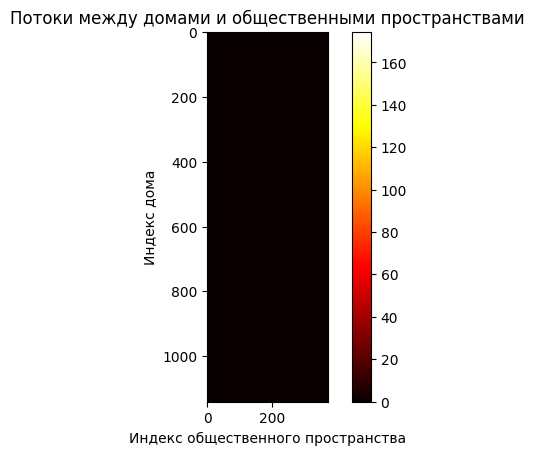

In [35]:
# Визуализация потоков (пример)
plt.imshow(gravity_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title("Потоки между домами и общественными пространствами")
plt.xlabel("Индекс общественного пространства")
plt.ylabel("Индекс дома")
plt.show()

# Исследование влияния параметров (пример)
# Можно изменить веса потоков, расстояния или другие параметры и оценить их влияние на результаты модели

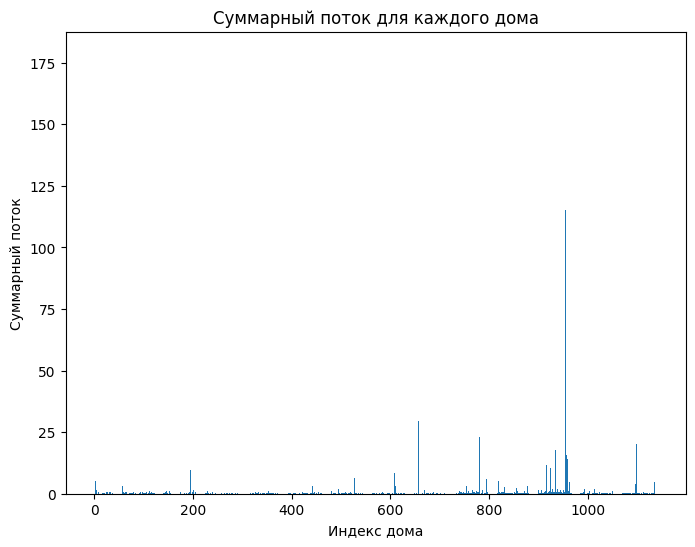

In [37]:
# График суммарного потока для каждого дома
plt.figure(figsize=(8, 6))
plt.bar(range(len(total_flow_per_house)), total_flow_per_house)
plt.title('Суммарный поток для каждого дома')
plt.xlabel('Индекс дома')
plt.ylabel('Суммарный поток')
plt.show()

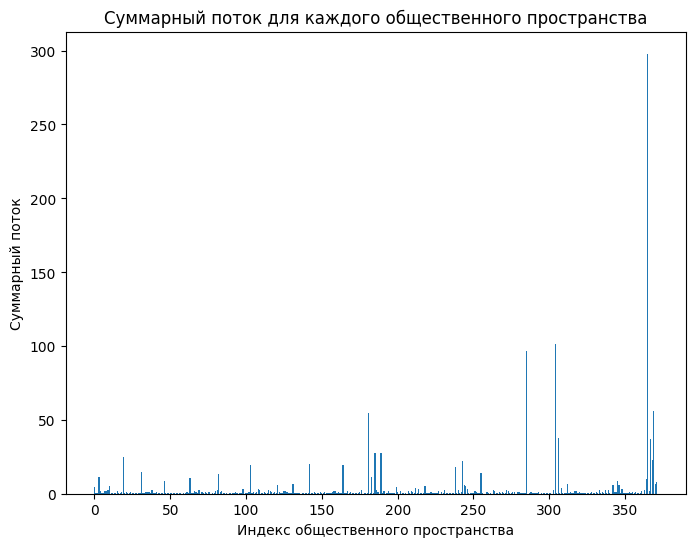

In [38]:
# График суммарного потока для каждого общественного пространства
plt.figure(figsize=(8, 6))
plt.bar(range(len(total_flow_per_op)), total_flow_per_op)
plt.title('Суммарный поток для каждого общественного пространства')
plt.xlabel('Индекс общественного пространства')
plt.ylabel('Суммарный поток')
plt.show()

Чтобы сравнить все четыре метода - Целочисленное программирование, Нейронные сети, GNN (Графовая нейронная сеть) и Гравитационную модель, буду рассматривать следующие аспекты:

1. Сложность реализации: Оценим сложность реализации каждого метода. 

2. Точность предсказания: Сравним точность предсказания каждого метода. Используя метрики оценки качества предсказания, такие как точность, среднеквадратичная ошибка итд

3. Время выполнения: Измерим время выполнения каждого метода для обучения модели и предсказания. 

4. Масштабируемость: Оценим масштабируемость каждого метода. Учитыввая возможность расширения модели для работы с большими объемами данных или распределенными вычислениями.

5. Объективность: Рассмотрим, насколько объективны и независимы результаты каждого метода. Некоторые методы могут быть более склонны к предвзятости или зависимости от исходных данных.

6. Интерпретируемость: Сравним, насколько легко интерпретировать и объяснить результаты каждого метода.

7. Ресурсоемкость: Оценим требования к вычислительным ресурсам 

